<a href="https://www.kaggle.com/code/majestyyolo/model-accuracy-comparison-on-social-network-ads?scriptVersionId=198697924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# Social Network Ads

## Table of contents
<ul>
    <li><a href = "#intro">Introduction</a></li>
    <li><a href = "#wrangling">Data Wrangling</a></li>
    <li><a href = "#preprocessing">Data Preprocessing</a></li>
    <li><a href = "#eda">Exploratory Data Analysis</a></li>
    <li><a href = "#features">Feature Engineering</a></li>
    <li><a href = "#modelling">Data Modelling</a></li>
    <li><a href = "#conclusion">Conclusions</a></li>
</ul>

___

<a id = "intro"></a>
## Introduction

### Dataset Description:
This dataset is a categorical dataset to determine whether a user purchased a particular product. Dataset was obtained from [kaggle](https://www.kaggle.com/datasets/rakeshrau/social-network-ads)
___

### Column Description:
- `User ID`: This is the User's unique Identification number
- `Gender`: Gender of the buyer
- `Age`: Age of the buyer
- `EstimatedSalary`: Estimated salary of the potential buyer
- `Purchased`: if the buyer purchased or not.

### Questions for Analysis:
- How many males purchased an item?
- How many females purchased an item?
- How many males didn't purchase an item?
- How many females didn't purchase an item?
- How many machine learning algorithms can accurately predict who will purchase an item or won't?

___

## Environment set-up

In [60]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id = "wrangling"></a>
___

## Data Wrangling

In this section, we will load our flat dataset from a csv file using `pandas` for further exploration

In [61]:
import os
print(os.listdir('/kaggle/input/social-network-ads/'))

['Social_Network_Ads.csv']


In [62]:
# importing the dataset
data = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [63]:
# displaying the first five records of our dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
# displaying all the records in our dataset
print(data.to_string())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

In [65]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [66]:
data.shape

(400, 5)

In [67]:
# value_counts() method is used to check the unique observations in a dataframe
data["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

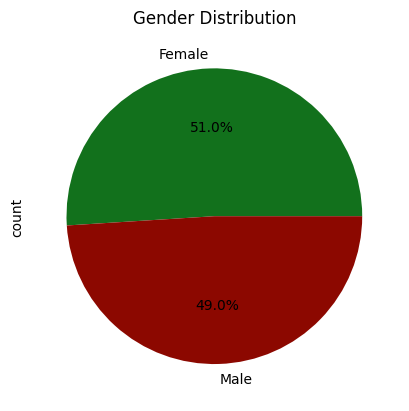

In [68]:
labels = ["Female", "Male"]
colors = sns.color_palette('dark')[2:4]
data["Gender"].value_counts().plot(kind = "pie", colors = colors, autopct = "%1.1f%%", labels = labels)
plt.title("Gender Distribution")
plt.show()

In [69]:
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

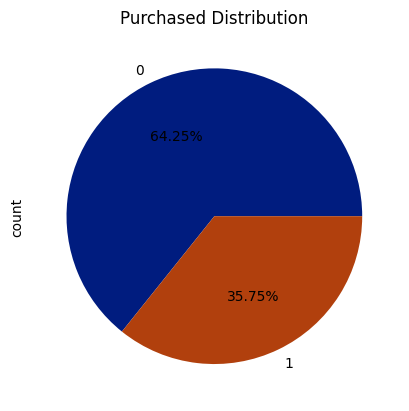

In [70]:
colors = sns.color_palette("dark")[0:4]
data["Purchased"].value_counts().plot(kind = "pie", autopct = "%1.2f%%", colors = colors)
plt.title("Purchased Distribution")
plt.show()

In [71]:
# showing the number of male employees that purchased an ad
data[(data["Gender"] == "Male") & (data["Purchased"] == 1)].shape[0]

66

___

`Q1` : How many males purchased an item?<br>
66 males purchased an item from an advertisement on social media

In [72]:
# showing the number of male employees that did not purchased an ad
data[(data["Gender"] == "Male") & (data["Purchased"] == 0)].shape[0]

130

___

`Q3` : How many males didn't purchase an item?<br>
130 males did not purchase an item from advertisement on social media

In [73]:
# showing the number of female employees that purchased an ad
data[(data["Gender"] == "Female") & (data["Purchased"] == 1)].shape[0]

77

___

`Q2` : How many females purchased an item?<br>
77 females purchased an item from advertisement on social media

In [74]:
# showing the number of female employees that purchased an ad
data[(data["Gender"] == "Female") & (data["Purchased"] == 0)].shape[0]

127

___

`Q4` : How many females didn't purchase an item?<br>
127 females did not purchase an item from an advertisement on social media

In [75]:
print(data.groupby(["Gender", "Purchased"]).size().unstack(fill_value = 0).to_string())

Purchased    0   1
Gender            
Female     127  77
Male       130  66


<a id = "preprocessing"></a>
___

## Data Preprocessing

In [76]:
# Because machine learning modules understand numbers and not strings, we'll have to encode the Gender column

# creating a labelEncoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# invoking fit_tranform method on object
data["Gender"] = le.fit_transform(data["Gender"])

In [77]:
data["Gender"].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

<a id = "eda"></a>
___
## Exploratory Data Analysis


In [78]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [80]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


<a id = "feature"></a>
___

## Feature Engineering
iGen: [1 - 24]<br>Millenials: [25 - 40]<br>GenX: [41 -55]<br>BabyBoomers: [56 - 75]<br>Silent Generation: [76 - 93]<br>Greatest Generation[94 and above]

In [81]:
data['Age Category'] = [
     'Gen Z' if age <= 24  else
    'Millennial' if 25 <= age <= 40 else 
    'Gen X' if 41 <= age <= 55 else 
    'Baby Boomer' if 56 <= age <= 75 else
    'Silent Generation' if 76 <= age <= 93 else
    "Greatest Generation"
    for age in list(data['Age'].values)
]

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,Gen Z
1,15810944,1,35,20000,0,Millennial
2,15668575,0,26,43000,0,Millennial
3,15603246,0,27,57000,0,Millennial
4,15804002,1,19,76000,0,Gen Z


In [82]:
# Using an income category [Inter-quatile range]
data["Income Category"] = pd.qcut(data["EstimatedSalary"], 3, labels = ["Low", "Medium", "High"])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,Gen Z,Low
1,15810944,1,35,20000,0,Millennial,Low
2,15668575,0,26,43000,0,Millennial,Low
3,15603246,0,27,57000,0,Millennial,Medium
4,15804002,1,19,76000,0,Gen Z,Medium


In [83]:
age_cat = data.groupby("Age Category").count()
inc_cat = data.groupby("Income Category").count()

/tmp/ipykernel_36/2259080109.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_cat = data.groupby("Income Category").count()


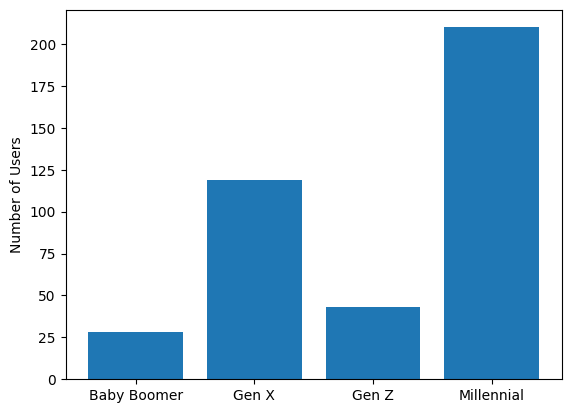

In [84]:
plt.bar(age_cat.index.values, age_cat["Age"])
plt.ylabel("Number of Users")
plt.show()

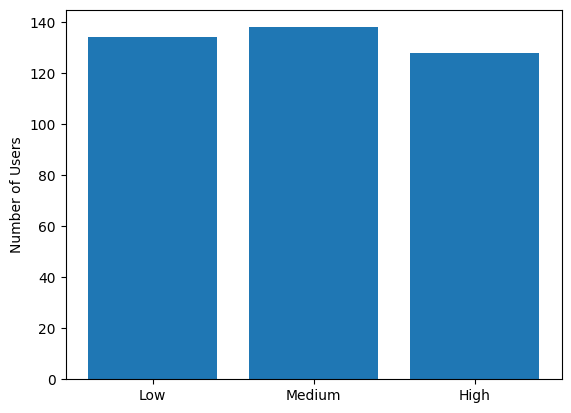

In [85]:
plt.bar(inc_cat.index.values, inc_cat["Age"])
plt.ylabel("Number of Users")
plt.show()

<a id = "model"></a>
___

## Model Building

In [86]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [87]:
# importing libraries for machine learning
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

# Splitting the data into train and test
x = data[["Gender", "Age", "EstimatedSalary"]]
y = data["Purchased"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

### Naive Bayes

In [88]:
# Fitting Naive Bayes to the training set

# importing Naive Bayes libraries
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
NB_classifier = GaussianNB()

# Train the model
NB_classifier = NB_classifier.fit(x_train, y_train)

In [89]:
# Make predictions
y_pred = NB_classifier.predict(x_test)

In [90]:
# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [91]:
# printing the individual scores
NB_classifier_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{NB_classifier_accuracy_score * 100:.0f}%\n")

NB_classifier_precision_score = precision_score(y_test, y_pred)
print(f"Precision Score:{NB_classifier_precision_score * 100:.0f}%\n")

NB_classification_recall_score = recall_score(y_test, y_pred)
print(f"Recall Score:{NB_classification_recall_score * 100:.0f}%\n")

NB_classifier_f1_score_score = f1_score(y_test, y_pred)
print(f"F1_Score:{NB_classifier_f1_score_score * 100:.0f}%")

Accuracy Score:94%

Precision Score:93%

Recall Score:89%

F1_Score:91%


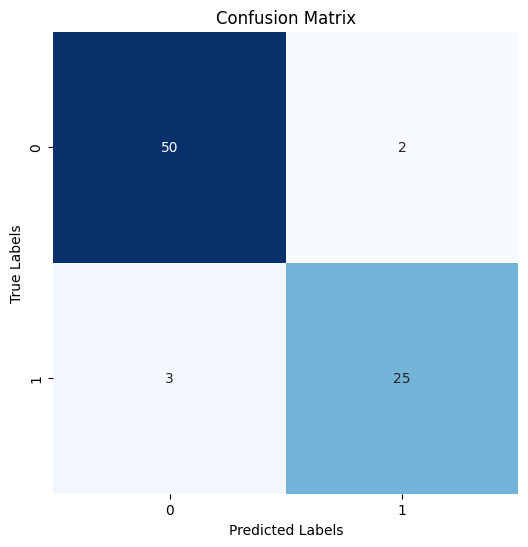

In [92]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [93]:
# importing libraries for roc and auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.93


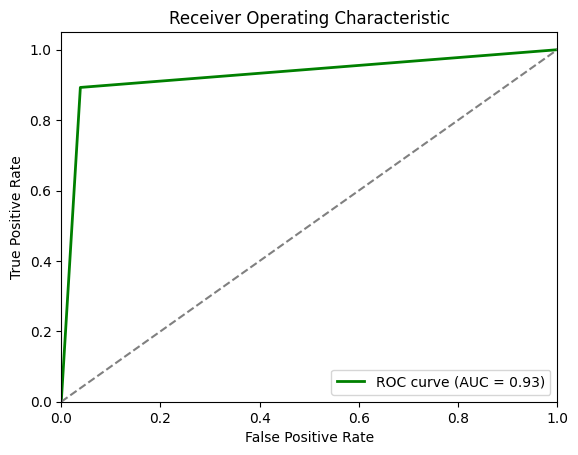

In [94]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'green', lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (naive bayes)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression

In [95]:
# Fitting Logistic Regression to the training set

# importing Logistic Regression libraries
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
LR_model = LogisticRegression(max_iter = 200, random_state = 42, C=0.5, solver='liblinear', penalty='l1')

# Train the model
LR_model = LR_model.fit(x_train, y_train)

In [96]:
# Make predictions
y_pred = LR_model.predict(x_test)

In [97]:
# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [98]:
# printing the individual scores
LR_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{LR_model_accuracy_score * 100:.0f}%\n")

LR_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision Score:{LR_model_precision_score * 100:.0f}%\n")

LR_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall Score:{LR_model_recall_score * 100:.0f}%\n")

LR_model_f1_score_score = f1_score(y_test, y_pred)
print(f"F1_Score:{LR_model_f1_score_score * 100:.0f}%")

Accuracy Score:86%

Precision Score:90%

Recall Score:68%

F1_Score:78%


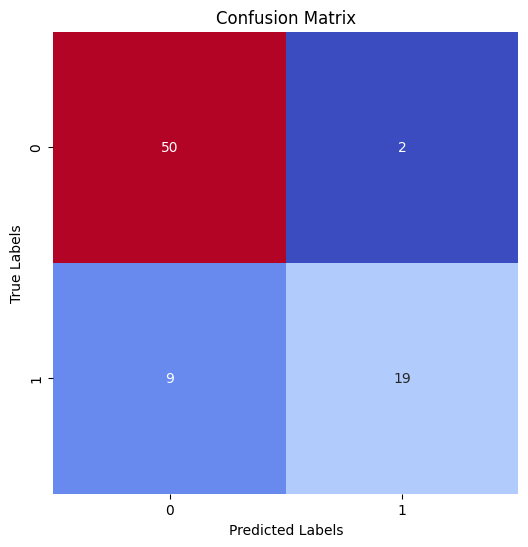

In [99]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [100]:
# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.82


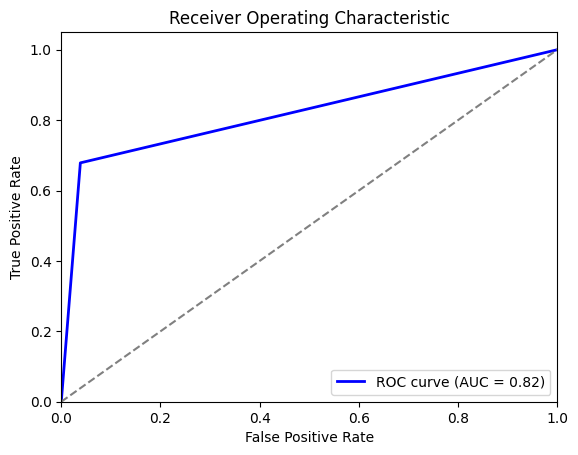

In [101]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (logistic regression)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [102]:
# Fitting Random forest to training set

# importing Random forest libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random forest model
RF_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model
RF_classifier = RF_classifier.fit(x_train, y_train)

In [103]:
# Make predictions
y_pred = RF_classifier.predict(x_test)

In [104]:
# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [105]:
# printing the individual scores
RF_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{RF_model_accuracy_score * 100:.0f}%\n")

RF_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision Score:{RF_model_precision_score * 100:.0f}%\n")

RF_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall Score:{RF_model_recall_score * 100:.0f}%\n")

RF_model_f1_score_score = f1_score(y_test, y_pred)
print(f"F1_Score:{RF_model_f1_score_score * 100:.0f}%")

Accuracy Score:90%

Precision Score:83%

Recall Score:89%

F1_Score:86%


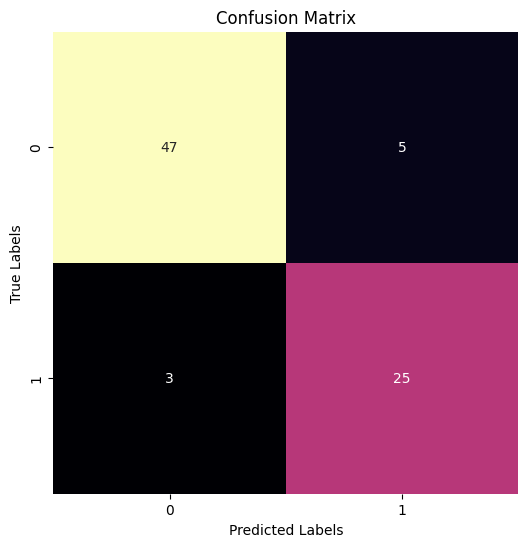

In [106]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [107]:
# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.90


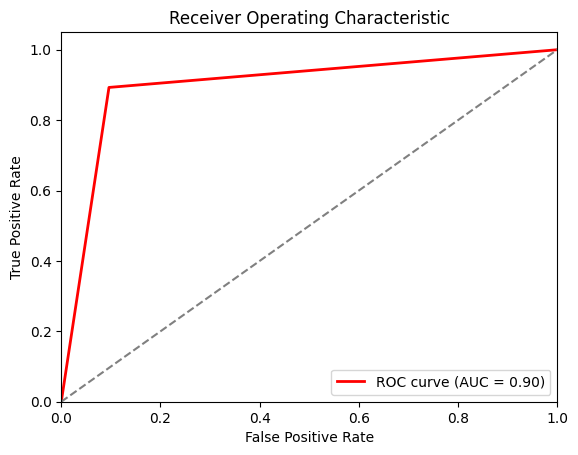

In [108]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'red', lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random forest)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### XGBoost

In [109]:
# Fitting XGBoost into the training set

# importing XGBoost libraries
import xgboost as xgb

# Initialize the XGBoost model
XGB_classifier = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 3, random_state = 42)

# Train the model
XGB_classifier = XGB_classifier.fit(x_train, y_train)


In [110]:
# Make predictions
y_pred = XGB_classifier.predict(x_test)

In [111]:
# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



In [112]:
# printing the individual scores
XGB_classifier_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{XGB_classifier_accuracy_score * 100:.0f}%\n")

XGB_classifier_precision_score = precision_score(y_test, y_pred)
print(f"Precision Score:{XGB_classifier_precision_score * 100:.0f}%\n")

XGB_classifier_recall_score = recall_score(y_test, y_pred)
print(f"Recall Score:{XGB_classifier_recall_score * 100:.0f}%\n")

XGB_classifier_f1_score_score = f1_score(y_test, y_pred)
print(f"F1_Score:{XGB_classifier_f1_score_score * 100:.0f}%")

Accuracy Score:88%

Precision Score:82%

Recall Score:82%

F1_Score:82%


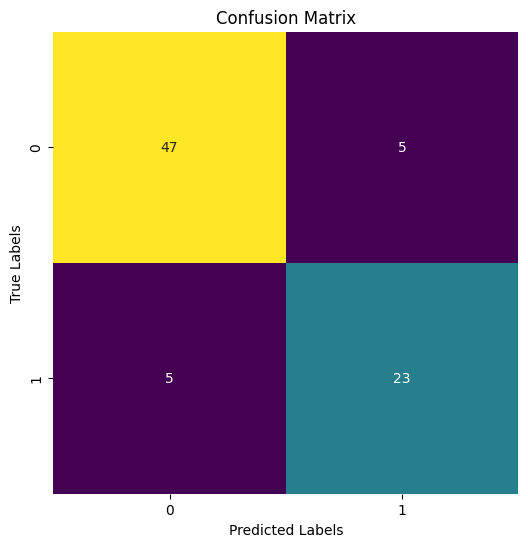

In [113]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [114]:
# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.86


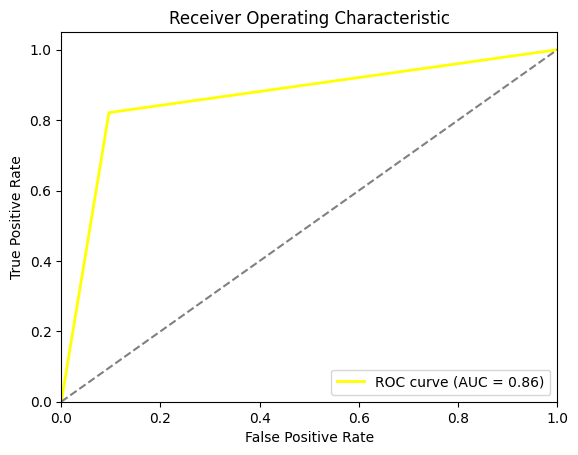

In [115]:
# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'yellow', lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (xgboost)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

<a id = "conclusion"></a>

___
## Conclusion


- The dataset was evaluated using four machine learning models: `naive bayes`, `logistic regression`, `random forest` and `xgboost`.
- `naive bayes`: had an accuracy of `94%` and an AUC score of `0.93`.
- `logistic regression`: had an accuracy of `86%` and an AUC score of `0.82`.
- `random forest`: had an accuracy of `90%` and an AUC score of `0.90`.
- `xgboost`: had an accuracy of `88%` and an AUC score of `0.86`.

- Therefore `naive bayes` model performed the best with the best auc score.